# **Práctica 4 - Algoritmos de Búsqueda Parte 1.**

## **Nodos**

In [37]:
import random
import matplotlib.pyplot as plt

class Node:
    def __init__(self, strName, intValue):
        self.name = strName
        self.value = intValue

    def __repr__(self):
        return f"{self.name} -> {self.value}"

def create_node_arr(size, type, low_limit, up_limit):
    arr = []
    i = 0
    while i < size:
        if type == 0:
            element = Node("Nodo " + str(i + 1), i + low_limit)
            arr.append(element)
        elif type == 1:
            element = Node("Nodo " + str(i + 1), up_limit - i)
            arr.append(element)
        elif type == 2:
            element = Node("Nodo " + str(i + 1), random.randint(low_limit, up_limit))
            arr.append(element)
        i += 1
    return arr

## **Búsqueda Lineal (Iterativa)**

### **Algoritmo**

In [38]:
def linear_search_iterative(arr, sought):
    time = 0
    i = 0
    n = len(arr)
    while i < n:
        time += 1
        if arr[i].value == sought:
            return i, time
        i += 1
    return -1, time

### **Prueba de Búsqueda**

In [39]:
MAX = 20
arr = create_node_arr(MAX, 1, 0, MAX)
sought = random.randint(0, MAX)
index, time = linear_search_iterative(arr, sought)
print(arr)
print("Nodo con el valor buscado", sought, "encontrado en la posición", index)

[Nodo 1 -> 20, Nodo 2 -> 19, Nodo 3 -> 18, Nodo 4 -> 17, Nodo 5 -> 16, Nodo 6 -> 15, Nodo 7 -> 14, Nodo 8 -> 13, Nodo 9 -> 12, Nodo 10 -> 11, Nodo 11 -> 10, Nodo 12 -> 9, Nodo 13 -> 8, Nodo 14 -> 7, Nodo 15 -> 6, Nodo 16 -> 5, Nodo 17 -> 4, Nodo 18 -> 3, Nodo 19 -> 2, Nodo 20 -> 1]
Nodo con el valor buscado 20 encontrado en la posición 0


### **Casos**

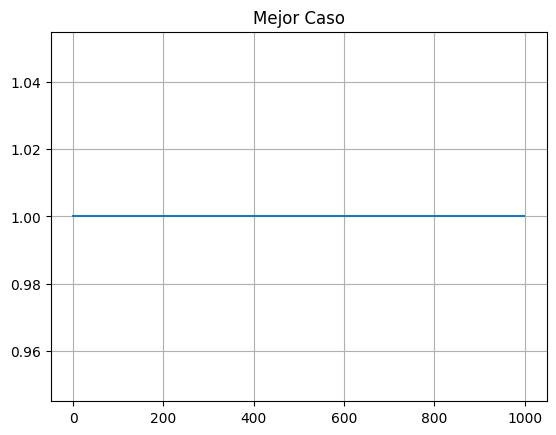

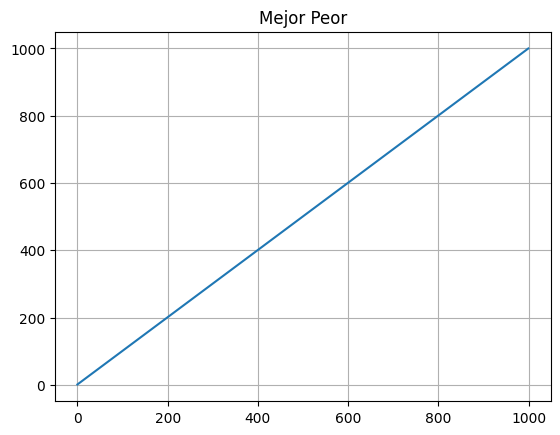

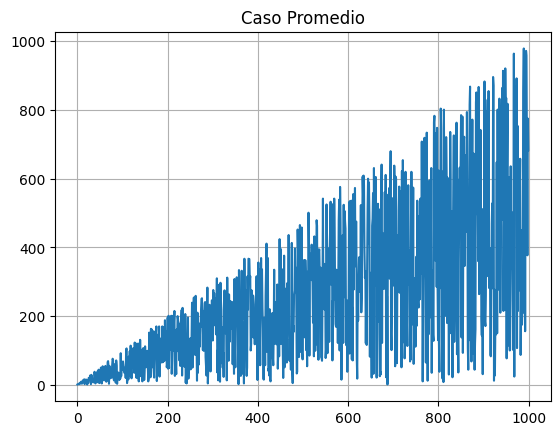

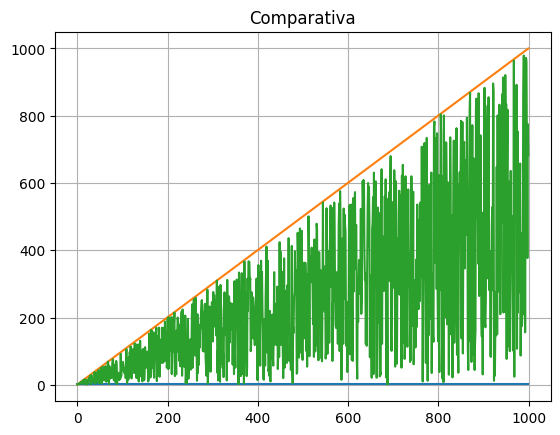

In [40]:
MAX = 1000
x = []
y_mejor = []
y_peor = []
y_prom = []
arr = create_node_arr(MAX, 0, 0, MAX)

for i in range(MAX):
    x.append(i)
    sought = 0 # <-------------------------------------------
    index, time = linear_search_iterative(arr, sought)
    y_mejor.append(time)

for i in range(MAX):
    sought = i # <-------------------------------------------
    index, time = linear_search_iterative(arr, sought)
    y_peor.append(time)

for i in range(MAX):
    sought = random.randint(0, i) # <-------------------------------------------
    index, time = linear_search_iterative(arr, sought)
    y_prom.append(time)

plt.title("Mejor Caso")
plt.plot(x, y_mejor)
plt.grid(True)
plt.show()

plt.title("Mejor Peor")
plt.plot(x, y_peor)
plt.grid(True)
plt.show()

plt.title("Caso Promedio")
plt.plot(x, y_prom)
plt.grid(True)
plt.show()

plt.title("Comparativa")
plt.plot(x, y_mejor)
plt.plot(x, y_peor)
plt.plot(x, y_prom)
plt.grid(True)
plt.show()

## **Búsqueda Lineal (Recursiva)**

### **Algoritmo**

In [41]:
def linear_search_recursive(arr, sought, index, time):
    time += 1
    n = len(arr)
    if index >= n:
        return -1, time
    if arr[index].value == sought:
        return index, time
    return linear_search_recursive(arr, sought, index + 1, time)

def linear_search_recursive_inter(arr, sought):
    return linear_search_recursive(arr, sought, 0, 0)

### **Prueba de Búsqueda**

In [42]:
MAX = 20
arr = create_node_arr(MAX, 1, 0, MAX)
print(arr)
sought = random.randint(0, MAX)
index, times = linear_search_recursive_inter(arr, sought)
print("Nodo con el valor buscado", sought, "encontrado en la posición", index)

[Nodo 1 -> 20, Nodo 2 -> 19, Nodo 3 -> 18, Nodo 4 -> 17, Nodo 5 -> 16, Nodo 6 -> 15, Nodo 7 -> 14, Nodo 8 -> 13, Nodo 9 -> 12, Nodo 10 -> 11, Nodo 11 -> 10, Nodo 12 -> 9, Nodo 13 -> 8, Nodo 14 -> 7, Nodo 15 -> 6, Nodo 16 -> 5, Nodo 17 -> 4, Nodo 18 -> 3, Nodo 19 -> 2, Nodo 20 -> 1]
Nodo con el valor buscado 6 encontrado en la posición 14


### **Casos**

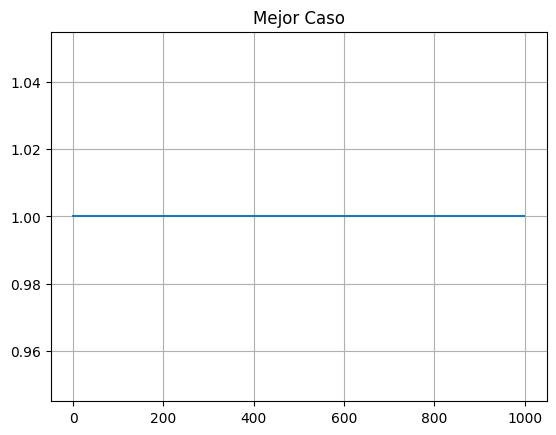

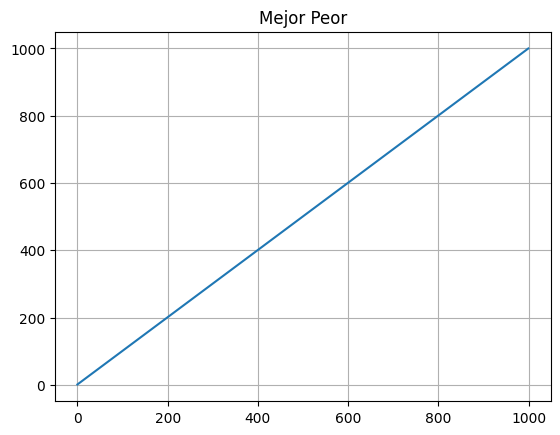

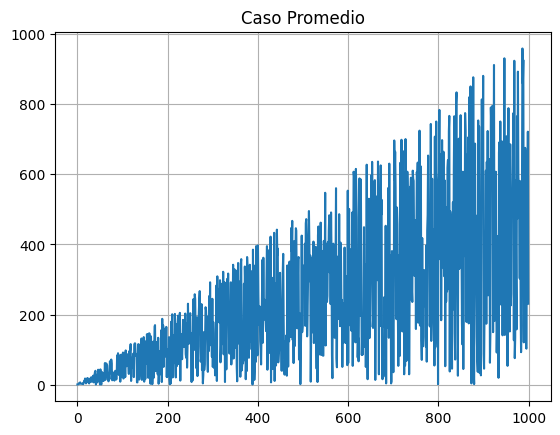

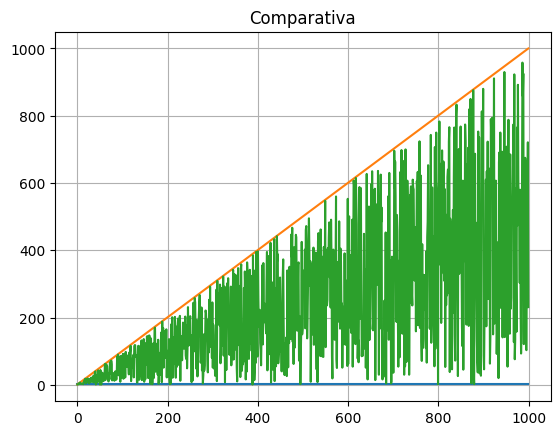

In [43]:
MAX = 1000
x = []
y_mejor = []
y_peor = []
y_prom = []
arr = create_node_arr(MAX, 0, 0, MAX)

for i in range(MAX):
    x.append(i)
    sought = 0 # <-------------------------------------------
    index, time = linear_search_recursive_inter(arr, sought)
    y_mejor.append(time)

for i in range(MAX):
    sought = i # <-------------------------------------------
    index, time = linear_search_recursive_inter(arr, sought)
    y_peor.append(time)

for i in range(MAX):
    sought = random.randint(0, i) # <-------------------------------------------
    index, time = linear_search_recursive_inter(arr, sought)
    y_prom.append(time)

plt.title("Mejor Caso")
plt.plot(x, y_mejor)
plt.grid(True)
plt.show()

plt.title("Mejor Peor")
plt.plot(x, y_peor)
plt.grid(True)
plt.show()

plt.title("Caso Promedio")
plt.plot(x, y_prom)
plt.grid(True)
plt.show()

plt.title("Comparativa")
plt.plot(x, y_mejor)
plt.plot(x, y_peor)
plt.plot(x, y_prom)
plt.grid(True)

## **Búsqueda Binaria (Iterativa)**

### **Algoritmos de Ordenamiento**

In [44]:
def bubble_sort(arr):
    time = 0
    n = len(arr)
    i = 0
    while i < n:
        j = 0
        while j < n - i - 1:
            time += 1
            if arr[j].value > arr[j + 1].value:
                temp = arr[j]
                arr[j] = arr[j + 1]
                arr[j + 1] = temp
            j += 1
        i += 1
    return time

def merge_sort(arr):
    time = 0
    n = len(arr)
    if n > 1:
        mid = n // 2
        L = arr[:mid]
        R = arr[mid:]
        time += merge_sort(L)
        time += merge_sort(R)
        i = 0
        j = 0
        k = 0
        while i < len(L) and j < len(R):
            time += 1
            if L[i].value < R[j].value:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
        while i < len(L):
            time += 1
            arr[k] = L[i]
            i += 1
            k += 1
        while j < len(R):
            time += 1
            arr[k] = R[j]
            j += 1
            k += 1
    return time

### **Algoritmo con Bubble Sort**

In [45]:
def binary_search_iterative_bubble(arr, sought):
    time = bubble_sort(arr)
    low = 0
    high = len(arr) - 1
    
    while low <= high:
        time += 1
        mid = (low + high) // 2
        if arr[mid].value == sought:
            return mid, time
        elif arr[mid].value < sought:
            low = mid + 1
        else:
            high = mid - 1
    return -1, time

### **Prueba de Búsqueda con Bubble Sort**

In [46]:
MAX = 20
arr = create_node_arr(MAX, 1, 0, MAX)
sought = random.randint(0, MAX)
index, time = binary_search_iterative_bubble(arr, sought)
print(arr)
print("Nodo con el valor buscado", sought, "encontrado en la posición", index)

[Nodo 20 -> 1, Nodo 19 -> 2, Nodo 18 -> 3, Nodo 17 -> 4, Nodo 16 -> 5, Nodo 15 -> 6, Nodo 14 -> 7, Nodo 13 -> 8, Nodo 12 -> 9, Nodo 11 -> 10, Nodo 10 -> 11, Nodo 9 -> 12, Nodo 8 -> 13, Nodo 7 -> 14, Nodo 6 -> 15, Nodo 5 -> 16, Nodo 4 -> 17, Nodo 3 -> 18, Nodo 2 -> 19, Nodo 1 -> 20]
Nodo con el valor buscado 4 encontrado en la posición 3


### **Algoritmo con Merge Sort**

In [47]:
def binary_search_iterative_merge(arr, sought):
    time = merge_sort(arr)
    low = 0
    high = len(arr) - 1

    while low <= high:
        time += 1
        mid = (low + high) // 2
        if arr[mid].value == sought:
            return mid, time
        elif arr[mid].value < sought:
            low = mid + 1
        else:
            high = mid - 1
    return -1, time

### **Prueba de Búsqueda con Merge Sort**

In [48]:
MAX = 20
arr = create_node_arr(MAX, 1, 0, MAX)
sought = random.randint(0, MAX)
index, time = binary_search_iterative_merge(arr, sought)
print(arr)
print("Nodo con el valor buscado", sought, "encontrado en la posición", index)

[Nodo 20 -> 1, Nodo 19 -> 2, Nodo 18 -> 3, Nodo 17 -> 4, Nodo 16 -> 5, Nodo 15 -> 6, Nodo 14 -> 7, Nodo 13 -> 8, Nodo 12 -> 9, Nodo 11 -> 10, Nodo 10 -> 11, Nodo 9 -> 12, Nodo 8 -> 13, Nodo 7 -> 14, Nodo 6 -> 15, Nodo 5 -> 16, Nodo 4 -> 17, Nodo 3 -> 18, Nodo 2 -> 19, Nodo 1 -> 20]
Nodo con el valor buscado 18 encontrado en la posición 17


## **Búsqueda Binaria (Recursiva)**

### **Algoritmo**

In [49]:
def binary_search_recursive(arr, sought, low, high, time):
    time += 1
    if low > high:
        return -1, time
    mid = (low + high) // 2
    if arr[mid].value == sought:
        return mid, time
    elif arr[mid].value < sought:
        return binary_search_recursive(arr, sought, mid + 1, high, time)
    else:
        return binary_search_recursive(arr, sought, low, mid - 1, time)

### **Ejecución con Bubble Sort**

In [50]:
def binary_search_recursive_bubble(arr, sought):
    bb_times = bubble_sort(arr)
    index, sea_time = binary_search_recursive(arr, sought, 0, len(arr) - 1, 0)
    return index, bb_times + sea_time

### **Prueba de Búsqueda con Bubble Sort**

In [54]:
MAX = 20
arr = create_node_arr(MAX, 1, 0, MAX)
sought = random.randint(0, MAX)
index, time = binary_search_recursive_bubble(arr, sought)
print(arr)
print("Nodo con el valor buscado", sought, "encontrado en la posición", index)

[Nodo 20 -> 1, Nodo 19 -> 2, Nodo 18 -> 3, Nodo 17 -> 4, Nodo 16 -> 5, Nodo 15 -> 6, Nodo 14 -> 7, Nodo 13 -> 8, Nodo 12 -> 9, Nodo 11 -> 10, Nodo 10 -> 11, Nodo 9 -> 12, Nodo 8 -> 13, Nodo 7 -> 14, Nodo 6 -> 15, Nodo 5 -> 16, Nodo 4 -> 17, Nodo 3 -> 18, Nodo 2 -> 19, Nodo 1 -> 20]
Nodo con el valor buscado 13 encontrado en la posición 12


### **Ejeución con Merge Sort**

In [ ]:
def binary_search_recursive_merge(arr, sought):
    bb_times = merge_sort(arr)
    index, sea_time = binary_search_recursive(arr, sought, 0, len(arr) - 1, 0)
    return index, bb_times + sea_time

### **Prueba de Ordenamiento con Merge Sort**

In [62]:
MAX = 20
arr = create_node_arr(MAX, 1, 0, MAX)
sought = random.randint(0, MAX)
index, cycles = binary_search_recursive_merge(arr, sought)
print(arr)
print("Nodo con el valor buscado", sought, "encontrado en la posición", index)

[Nodo 20 -> 1, Nodo 19 -> 2, Nodo 18 -> 3, Nodo 17 -> 4, Nodo 16 -> 5, Nodo 15 -> 6, Nodo 14 -> 7, Nodo 13 -> 8, Nodo 12 -> 9, Nodo 11 -> 10, Nodo 10 -> 11, Nodo 9 -> 12, Nodo 8 -> 13, Nodo 7 -> 14, Nodo 6 -> 15, Nodo 5 -> 16, Nodo 4 -> 17, Nodo 3 -> 18, Nodo 2 -> 19, Nodo 1 -> 20]
Nodo con el valor buscado 2 encontrado en la posición 1
